In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import uproot
import py_helpers.group_apply as ga
import py_helpers.klm_helpers as klm
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline

In [3]:
file = uproot.open("data/peschke_210_nLayerTrigger_7_particlegun.root")
MCParticles = file["MCParticles"].pandas.df()
KLMDigits = file["KLMDigits"].pandas.df()


# provide unique ID that defines each paricle
MCParticles["particle_nr"] = range(len(MCParticles)) 
# convert momentum in angular direction

MCParticles["theta"] = np.arctan2(np.sqrt(MCParticles["px"]*MCParticles["px"]+MCParticles["py"]*MCParticles["py"]),MCParticles["pz"])
MCParticles["phi"]   = np.arctan2(MCParticles["py"],MCParticles["px"]) 

# Remove all particles that are not muons
MC_Muon = MCParticles[(MCParticles.PDG == 13)| (MCParticles.PDG == -13)] 


# KLM digits have a "section", "sub-detector" axis which can be simplified to just one axis "i_sector"
KLMDigits = klm.add_i_section(KLMDigits) 

config = pd.read_csv("configuration/KLM_acceptance_revers.csv", delimiter = ";")  


In [4]:
def geometry_Converter(section, sector, layer, Strip, plane):
    [x,y,z] = klm.geometryConverter(section, sector, layer, Strip, Strip)
    y = y if plane == klm.c_PhiPlane else z
    return [x, y]

KLMDigits_1 = ga.group_apply(KLMDigits, [x for x in KLMDigits.columns], ["x","y"] , geometry_Converter, ["section","sector","layer","strip","strip"])

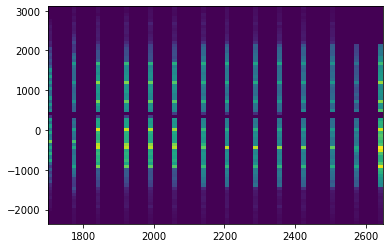

In [5]:
dummy = plt.hist2d(KLMDigits_1.x,KLMDigits_1.y, bins=70)

In [15]:
def linear_fit(x,y,layer):
    f =  np.polyfit(x,y,1)
    l_count = len(np.unique(layer))
    return [f[0], f[1] , l_count]


KLMDigits_2 = ga.group_apply(KLMDigits_1, ["event_nr","Subdetector","section","i_sector","sector", "plane"], ["slope","offset","layer_count"] , linear_fit, ["x","y","layer"])
KLMDigits_2

/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorl

/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorl

/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorl

/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorl

/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorl

/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorl

/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorl

/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorl

/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorl

/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorl

/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorl

/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorl

/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorl

/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorl

/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorl

/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorl

/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorl

/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorl

/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorly conditioned
  return func(*df_input, *args, **kwargs)
/mnt/c/Users/Richa/Documents/github/python_tutorial_2021/py_helpers/group_apply.py:20: RankWarning: Polyfit may be poorl

,event_nr,Subdetector,section,i_sector,sector,plane,slope,offset,layer_count
0,1,2.0,1.0,3,1.0,1.0,0.709165,110.433753,9
1,1,2.0,1.0,3,1.0,2.0,0.296913,283.990277,10
2,2,1.0,0.0,2,2.0,0.0,-0.155771,-28.622652,15
3,2,1.0,0.0,2,2.0,1.0,-0.093825,-2.955778,15
4,3,1.0,0.0,2,2.0,0.0,-0.467281,-309.456754,8
...,...,...,...,...,...,...,...,...,...
20263,9998,1.0,1.0,1,8.0,1.0,0.641435,-1745.390259,6
20264,9999,1.0,0.0,2,3.0,0.0,-0.236610,-242.649827,15
20265,9999,1.0,0.0,2,3.0,1.0,-0.493132,229.341205,15
20266,10000,2.0,1.0,3,2.0,1.0,0.503424,589.184317,3


In [7]:


r = pd.DataFrame()
r["x"] = np.arange(-200, 3000,10)
r["ind"] = 1
KLMDigits_2["ind"]  =1 
KLMDigits_3 = KLMDigits_2.merge(r,on="ind")
KLMDigits_3["y"] =  KLMDigits_3.x*KLMDigits_3.slope +KLMDigits_3.offset

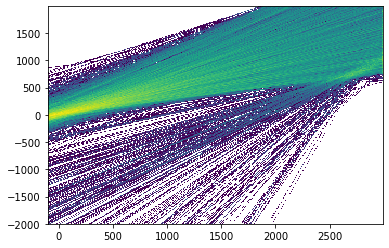

In [10]:
df = KLMDigits_3[(KLMDigits_3.i_sector == 1)&(KLMDigits_3.plane==0)&(KLMDigits_3.layer_count>5)]
dummy = plt.hist2d(df.x,df.y,bins=(np.arange(-100,3000,10),np.arange(-2000,2000,10)),norm=mpl.colors.LogNorm())

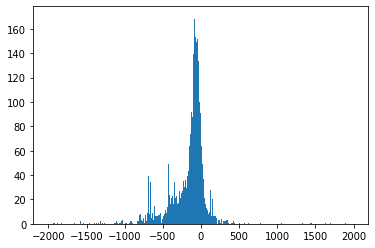

In [11]:
dummy=plt.hist(KLMDigits_2[(KLMDigits_2.i_sector==2)&(KLMDigits_2.plane==0)].offset,bins=np.arange(-2000,2000,10))

In [12]:
muon_with_digits = klm.corelate_sectors_to_mc_muons(klm_digits=KLMDigits_2,mc_particles=MC_Muon,df_acceptance=config)

    

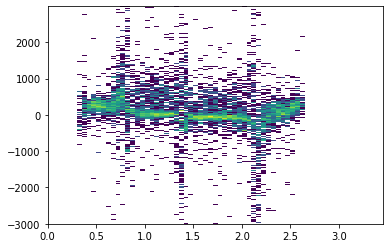

In [13]:
df = muon_with_digits
dummy = plt.hist2d(df.theta,df.offset,bins=[ np.arange(0,3.5,0.05) ,np.arange(-3000,3000,10)],norm=mpl.colors.LogNorm())